In [1]:
#Stat

#load data from csv file
import csv
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

data_path = "C:/Users/chrel/Documents/GitHub/Fagprojekt_MeltpondsNY/pixels_dup_removed.csv"


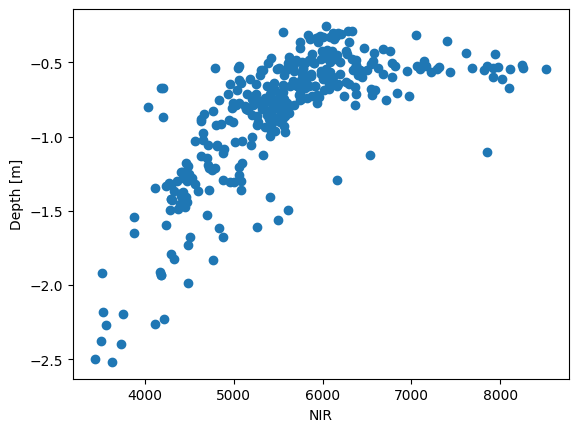

In [21]:
columns = ["Meltpond index","Latitude","Longtitude","b08 (NIR)","b02 (red)","b03 (green)","b04 (blue)","Depth [m]","Sentinel Time","IceSat Time"]
#load data with columns
data = pd.read_csv(data_path, names=columns)
data
plt.plot(data["b03 (green)"],data["Depth [m]"],'o')
plt.xlabel("NIR")
plt.ylabel("Depth [m]")
plt.show()


In [34]:
#Lav en stat linær model fra sk learn.

#Læs random forrrest fra sk learn For at få flere features.

#80% træn og 20%test

#data agumentation color jitter 
columns = ["b08 (NIR)","b02 (red)","b03 (green)","b04 (blue)"]

X=data[columns].to_numpy()

In [35]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

reg.fit(X, data["Depth [m]"])

LinearRegression()

In [37]:
?reg

Type:        LinearRegression
String form: LinearRegression()
File:        c:\users\chrel\appdata\local\programs\python\python311\lib\site-packages\sklearn\linear_model\_base.py
Docstring:  
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

copy_X : bool, default=True
    If True, X will be copied; else, it may be overwritten.

n_jobs : int, default=None
    The number of jobs to use for the computation. This will only provide
    speedup in case of sufficiently large problems, that is if firstly
    `n_targets > 1` and secondly `X` is sparse or if `positive` is set


In [43]:
model_depths = reg.predict(X)

fejl= model_depths-data["Depth [m]"]

fejlmean=sum(abs(fejl))/len(fejl)
fejlmean

0.1555019962304773